<a name='1'></a>
## Importing all the required libraries

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
np.random.seed(1)

<a name='4-1'></a>
### Load the SIGNS Dataset

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

In [2]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


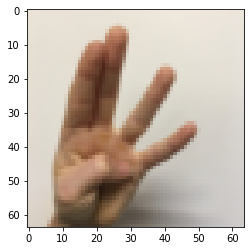

In [3]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

<a name='4-2'></a>
### Split the Data into Train/Test Sets

In Course 2, you built a fully-connected network for this dataset. But since this is an image dataset, it is more natural to apply a ConvNet to it.

To get started, let's examine the shapes of your data. 

In [4]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [5]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    Z1=tf.keras.layers.Conv2D(filters=8,kernel_size=(4,4),strides=(1,1),padding='same')(input_img)
    A1=tf.keras.layers.ReLU()(Z1)
    P1=tf.keras.layers.MaxPooling2D(pool_size=(8,8),strides=(8,8),padding='same')(A1)
    Z2=tf.keras.layers.Conv2D(filters=16,kernel_size=(2,2),strides=(1,1),padding='same')(P1)
    A2=tf.keras.layers.ReLU()(Z2)
    P2=tf.keras.layers.MaxPooling2D(pool_size=(4,4),strides=(4,4),padding='same')(A2)
    F=tf.keras.layers.Flatten()(P2)
    outputs=tf.keras.layers.Dense(units=6,activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [6]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

Both the Sequential and Functional APIs return a TF Keras model object. The only difference is how inputs are handled inside the object model! 

<a name='4-4'></a>
### Train the Model

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 45ms/step - loss: 1.8075 - accuracy: 0.1500 - val_loss: 1.7908 - val_accuracy: 0.1583
Epoch 2/100
17/17 [==============================] - 1s 32ms/step - loss: 1.7901 - accuracy: 0.1444 - val_loss: 1.7836 - val_accuracy: 0.1750
Epoch 3/100
17/17 [==============================] - 1s 34ms/step - loss: 1.7843 - accuracy: 0.1870 - val_loss: 1.7785 - val_accuracy: 0.2333
Epoch 4/100
17/17 [==============================] - 1s 34ms/step - loss: 1.7786 - accuracy: 0.2407 - val_loss: 1.7723 - val_accuracy: 0.3250
Epoch 5/100
17/17 [==============================] - 1s 34ms/step - loss: 1.7730 - accuracy: 0.2694 - val_loss: 1.7646 - val_accuracy: 0.3583
Epoch 6/100
17/17 [==============================] - 1s 34ms/step - loss: 1.7661 - accuracy: 0.3157 - val_loss: 1.7558 - val_accuracy: 0.3833
Epoch 7/100
17/17 [==============================] - 1s 33ms/step - loss: 1.7573 - accuracy: 0.3435 - val_loss: 1.7447 - val_accuracy: 0.4083
Epoch 

17/17 [==============================] - 1s 32ms/step - loss: 0.7778 - accuracy: 0.7463 - val_loss: 0.8520 - val_accuracy: 0.7000
Epoch 59/100
17/17 [==============================] - 1s 33ms/step - loss: 0.7707 - accuracy: 0.7463 - val_loss: 0.8475 - val_accuracy: 0.7000
Epoch 60/100
17/17 [==============================] - 1s 33ms/step - loss: 0.7634 - accuracy: 0.7509 - val_loss: 0.8419 - val_accuracy: 0.7000
Epoch 61/100
17/17 [==============================] - 1s 33ms/step - loss: 0.7566 - accuracy: 0.7546 - val_loss: 0.8376 - val_accuracy: 0.7000
Epoch 62/100
17/17 [==============================] - 1s 33ms/step - loss: 0.7499 - accuracy: 0.7528 - val_loss: 0.8327 - val_accuracy: 0.7000
Epoch 63/100
17/17 [==============================] - 1s 33ms/step - loss: 0.7432 - accuracy: 0.7546 - val_loss: 0.8280 - val_accuracy: 0.7000
Epoch 64/100
17/17 [==============================] - 1s 34ms/step - loss: 0.7369 - accuracy: 0.7546 - val_loss: 0.8239 - val_accuracy: 0.7000
Epoch 65/100

<a name='5'></a>
## History Object 

The history object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that you can retrieve at `history.history`: 

In [8]:
history.history

{'loss': [1.8075289726257324,
  1.7900727987289429,
  1.7843079566955566,
  1.7785608768463135,
  1.7729928493499756,
  1.7661259174346924,
  1.7573407888412476,
  1.746993064880371,
  1.7339437007904053,
  1.7184885740280151,
  1.6999131441116333,
  1.6788710355758667,
  1.6564253568649292,
  1.6303786039352417,
  1.6007349491119385,
  1.5704988241195679,
  1.5376850366592407,
  1.503550410270691,
  1.466727614402771,
  1.431300163269043,
  1.3981544971466064,
  1.3653234243392944,
  1.3336412906646729,
  1.3029593229293823,
  1.2746455669403076,
  1.246337652206421,
  1.2185295820236206,
  1.1932384967803955,
  1.1689894199371338,
  1.1458697319030762,
  1.1229089498519897,
  1.1011714935302734,
  1.081276535987854,
  1.0625417232513428,
  1.0438508987426758,
  1.0259044170379639,
  1.0093883275985718,
  0.9930001497268677,
  0.9776453375816345,
  0.9633499979972839,
  0.9494733810424805,
  0.9358317852020264,
  0.9228924512863159,
  0.9107284545898438,
  0.8988677859306335,
  0.8869

Now visualize the loss over time using `history.history`: 

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

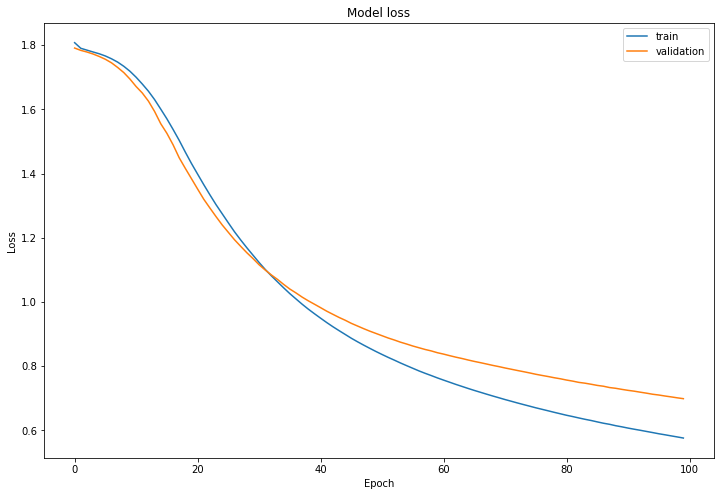

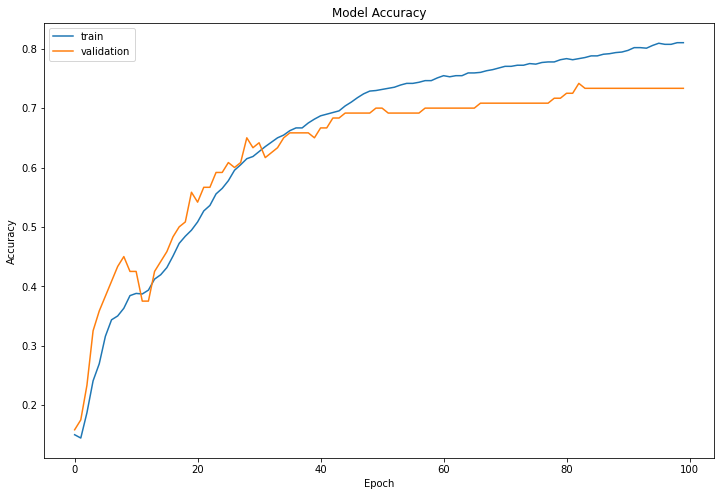

In [9]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')